[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


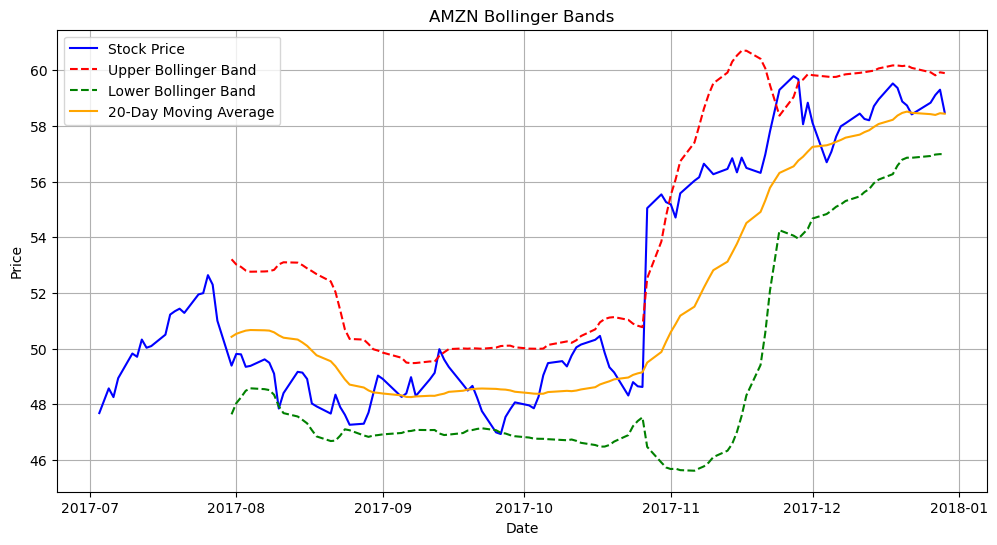

[*********************100%%**********************]  1 of 1 completed
Time-Weighted Return: 3.07%
Cumulative Strategy Return: 1.53%
Sharpe Ratio: 0.06
Total Profit: $3.07


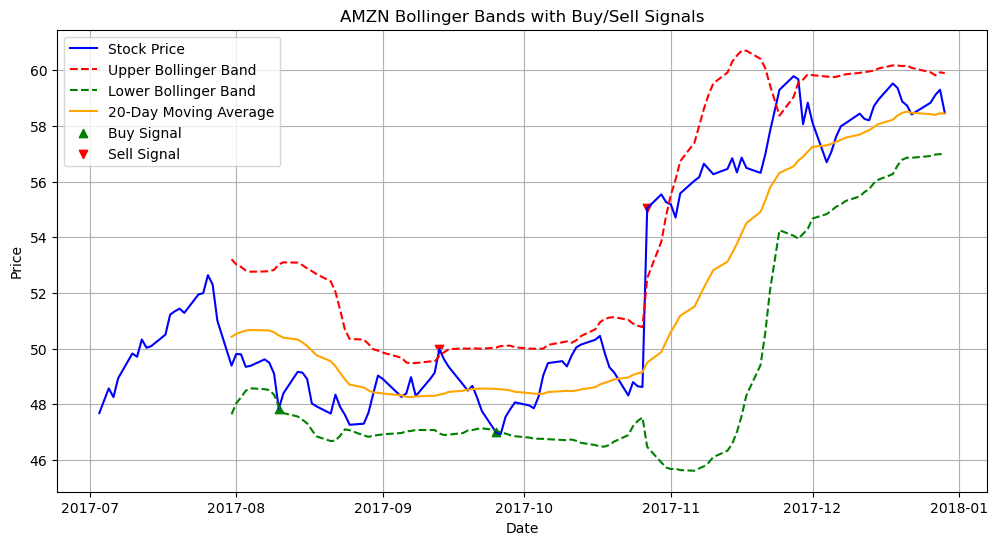

In [11]:
# Bollinger Band Analysis
# Upper Bollinger Band: resistance level of the price range.
# Indicates overbought, a reversal or a period of consolidation.

# Squeeze: Distance between upper and lower bands narrows, indicates low volatility
# and price breakout in the near future.

# Bollinger Band Breakout: stock price moves outside the bands, possible new trend

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock ticker symbol and time frame
ticker = "AMZN"
start_date = "2017-07-01"
end_date = "2017-12-31"
benchmark_ticker = "^GSPC"  # S&P 500

# Fetch historical stock price data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)
benchmark_df = yf.download(benchmark_ticker, start=start_date, end=end_date)

# Calculate the 20-day moving average
df['20MA'] = df['Close'].rolling(window=20).mean()

# Calculate the standard deviation of the closing prices
df['std'] = df['Close'].rolling(window=20).std()

# Calculate Bollinger Bands
df['Upper'] = df['20MA'] + (df['std'] * 2)
df['Lower'] = df['20MA'] - (df['std'] * 2)

# Plot the stock price and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price', color='blue')
plt.plot(df.index, df['Upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.plot(df.index, df['20MA'], label='20-Day Moving Average', color='orange')

plt.title(f'{ticker} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Simulation of buying and selling when the closing prices touch or nears
# the Bollinger Bands

# Initialize variables for tracking positions
position = None  # Position can be 'long', 'short', or None
buy_price = 0.0
sell_price = 0.0
total_profit = 0.0
previous_balance = 100  # Store balance before the first trade


# Define transaction costs (e.g., commission per trade)
commission_per_trade = 0.00  # Replace with the actual commission rate for your brokerage

# Fees to be considered
# The bid-ask spread
# Account maintenance fees, inactivity fees, or other administrative charges.
# Margin Interest
# Exchange Fees: market data access and order routing.

# Lists to store buy and sell signals for plotting
buy_signals = []
sell_signals = []

# Simulate buying and selling based on Bollinger Bands (including touch events)
for index, row in df.iterrows():
    if row['Close'] < row['Lower']:
        # Buy signal or touch event
        if position != 'long':
            position = 'long'
            buy_price = row['Close']
            buy_signals.append(index)
    elif row['Close'] > row['Upper']:
        # Sell signal or touch event
        if position != 'short':
            position = 'short'
            sell_price = row['Close']
            sell_signals.append(index)
    elif position == 'long' and row['Close'] > row['20MA']:
        # Sell long position when price crosses above the 20MA
        position = None
        total_profit += (row['Close'] - buy_price)
    elif position == 'short' and row['Close'] < row['20MA']:
        # Cover short position when price crosses below the 20MA
        position = None
        total_profit += (sell_price - row['Close'])

# Calculate the time-weighted return
time_weighted_return = total_profit / previous_balance

# Calculate the daily returns for the benchmark index (S&P 500)
benchmark = yf.download('^GSPC', start=start_date, end=end_date)
benchmark['Daily_Return'] = benchmark['Adj Close'].pct_change()

# Calculate the annualized return for the benchmark
num_trading_days = len(benchmark)
benchmark_return = (benchmark['Daily_Return'].mean() + 1) ** num_trading_days - 1


# Calculate the cumulative return of the strategy and the benchmark which
# accounts for compounding over the trading period, how much your initial investment
# would have grown if you reinvested the returns at the same rate.
cumulative_strategy_return = (1 + time_weighted_return) ** (len(df) / 252) - 1

# Calculate the strategy's Sharpe ratio (assuming a risk-free rate of 0%)
strategy_std_dev = df['Close'].pct_change().std() * (252 ** 0.5)
sharpe_ratio = cumulative_strategy_return / strategy_std_dev

# Print performance metrics
print(f'Time-Weighted Return: {time_weighted_return:.2%}')
print(f'Cumulative Strategy Return: {cumulative_strategy_return:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Total Profit: ${total_profit:.2f}') # Print the total profit
        
# Plot the stock price and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price', color='blue')
plt.plot(df.index, df['Upper'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.plot(df.index, df['20MA'], label='20-Day Moving Average', color='orange')

# Plot buy and sell signals
plt.scatter(buy_signals, [df.loc[i, 'Close'] for i in buy_signals], marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals, [df.loc[i, 'Close'] for i in sell_signals], marker='v', color='red', label='Sell Signal')

plt.title(f'{ticker} Bollinger Bands with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()